# Importing libraries

In [1]:
# Importing libraries
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math

# Reading the file

In [2]:
# Reading the file
bank_data = pd.read_csv("bank-full.csv", delimiter = ";")

In [3]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
#type(bank_data)

In [5]:
#bank_data.dtypes

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#bank_data.columns
#bank_data.job

In [8]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [10]:
bank_data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [11]:
#X=bank_data.iloc[:,:-1]
#Y=bank_data.iloc[:,[5]]
#X
#Y

In [12]:
#bank_data.columns
#a1= bank_data[0:3]
#a1
#a2= bank_data[1:3]
#a2
#bank_data.balance or #bank_data['balance']  
#b1 = bank_data[bank_data['balance']==1]
#b1
#b2 = bank_data[bank_data['balance']<10]
#b2    

In [13]:
# Checking for missing values 
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
# Checking for duplicates 
bank_data.duplicated().any()

False

In [15]:
# Checking for unique values
bank_data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [16]:
# Checking for what are the unique values in respective column
bank_data.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [17]:
# Mapping yes and no values to binary values
bank_data['default'] = bank_data['default'].map({'yes': 1, 'no': 0})
bank_data['housing'] = bank_data['housing'].map({'yes': 1, 'no':0})
bank_data['loan'] = bank_data['loan'].map({'yes': 1, 'no': 0})
bank_data['y'] = bank_data['y'].map({'yes': 1, 'no':0})

In [18]:
# Checking for changes in the data
bank_data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
27016,50,self-employed,divorced,secondary,0,985,1,1,telephone,21,nov,167,1,-1,0,unknown,0
26554,40,admin.,married,secondary,0,7711,1,0,cellular,20,nov,190,5,135,1,failure,0
38418,27,services,single,secondary,0,353,1,0,cellular,15,may,663,1,-1,0,unknown,1
11534,55,management,married,unknown,0,179,0,0,unknown,19,jun,97,1,-1,0,unknown,0
19496,30,technician,married,secondary,0,371,0,0,cellular,7,aug,124,2,-1,0,unknown,0
36508,39,blue-collar,divorced,secondary,0,0,1,0,cellular,12,may,15,7,-1,0,unknown,0
39566,51,entrepreneur,married,primary,0,1443,0,0,cellular,26,may,574,1,97,10,success,0
2883,47,blue-collar,married,primary,0,2,1,1,unknown,14,may,164,1,-1,0,unknown,0
19912,50,management,married,tertiary,0,290,0,1,cellular,8,aug,50,2,-1,0,unknown,0
15152,43,blue-collar,married,primary,0,255,1,0,cellular,17,jul,180,1,-1,0,unknown,0


In [19]:
bank_data.shape

(45211, 17)

In [20]:
len (bank_data)

45211

In [21]:
# Removing the unknown values form the dataset
bank_data.drop(bank_data[bank_data['job'] == 'unknown'].index, inplace=True)
bank_data.drop(bank_data[bank_data['marital'] == 'unknown'].index, inplace=True)
bank_data.drop(bank_data[bank_data['education'] == 'unknown'].index, inplace=True)
bank_data.drop(bank_data[bank_data['default'] == 'unknown'].index, inplace=True)
bank_data.drop(bank_data[bank_data['housing'] == 'unknown'].index, inplace=True)
bank_data.drop(bank_data[bank_data['loan'] == 'unknown'].index, inplace=True)
#bank_data.drop(bank_data[bank_data['contact'] == 'unknown'].index, inplace=True)
#bank_data.drop(bank_data[bank_data['poutcome'] == 'unknown'].index, inplace=True)

In [22]:
# Checking for changes in the data
bank_data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13059,26,management,single,tertiary,0,122,0,1,cellular,8,jul,160,1,-1,0,unknown,0
18104,58,management,married,tertiary,0,591,1,0,cellular,30,jul,233,3,-1,0,unknown,0
12491,37,technician,single,tertiary,0,0,0,0,unknown,1,jul,1135,2,-1,0,unknown,1
30850,32,blue-collar,married,primary,0,183,1,0,cellular,9,feb,308,4,208,3,other,0
21901,56,retired,married,primary,0,681,0,0,cellular,20,aug,204,4,-1,0,unknown,0
53,42,admin.,single,secondary,0,-76,1,0,unknown,5,may,787,1,-1,0,unknown,0
13880,39,management,married,tertiary,0,-4,0,0,cellular,10,jul,358,1,-1,0,unknown,0
34990,32,blue-collar,married,secondary,0,678,1,0,cellular,6,may,147,1,-1,0,unknown,0
21167,32,self-employed,married,tertiary,0,1464,0,0,telephone,14,aug,133,2,-1,0,unknown,0
28903,31,unemployed,single,primary,0,163,0,0,cellular,30,jan,707,2,2,1,other,1


In [23]:
bank_data.shape

(43193, 17)

In [24]:
len (bank_data)

43193

In [25]:
bank_data.value_counts(['y'])

y
0    38172
1     5021
dtype: int64

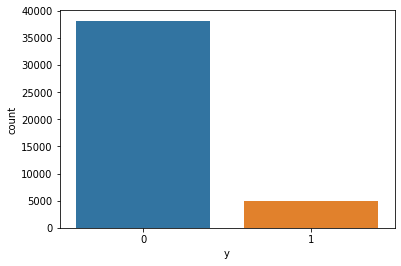

In [26]:
sns.countplot( x='y' , data = bank_data )

In [27]:
bank_data.loan.value_counts()

0    36086
1     7107
Name: loan, dtype: int64

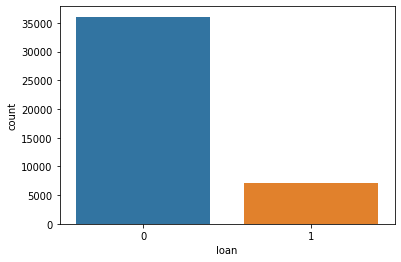

In [28]:
sns.countplot(x="loan", data=bank_data)

In [29]:
cnoloan = len(bank_data[bank_data['y']== 0])
cyesloan= len(bank_data[bank_data['y']== 1])


print(f'The percentage of customers who not get the loan = {cnoloan/len(bank_data.y)*100:.2f}% ')
print(f'The percentage of customers who get the loan = {cyesloan/len(bank_data.y)*100:.2f}% ')

The percentage of customers who not get the loan = 88.38% 
The percentage of customers who get the loan = 11.62% 


In [30]:
bank_data.groupby('y').mean()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
y,,,,,,,,,,
0,40.669679,0.019229,1297.333176,0.587289,0.173792,15.900529,221.115949,2.838704,36.709394,0.507230
1,41.481777,0.009560,1785.043019,0.373232,0.094204,15.116710,541.191994,2.145987,68.492731,1.175065


# Visualization

In [31]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43193 non-null  int64 
 1   job        43193 non-null  object
 2   marital    43193 non-null  object
 3   education  43193 non-null  object
 4   default    43193 non-null  int64 
 5   balance    43193 non-null  int64 
 6   housing    43193 non-null  int64 
 7   loan       43193 non-null  int64 
 8   contact    43193 non-null  object
 9   day        43193 non-null  int64 
 10  month      43193 non-null  object
 11  duration   43193 non-null  int64 
 12  campaign   43193 non-null  int64 
 13  pdays      43193 non-null  int64 
 14  previous   43193 non-null  int64 
 15  poutcome   43193 non-null  object
 16  y          43193 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 6.9+ MB


In [32]:
# categorical = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

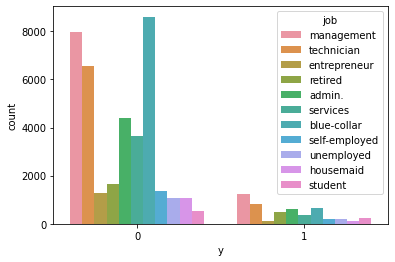

In [33]:
sns.countplot(x='y', hue='job', data= bank_data)

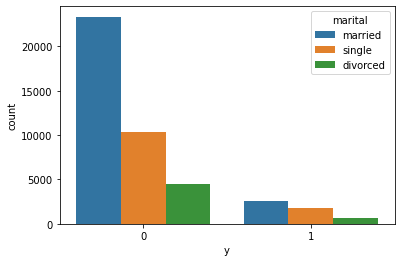

In [34]:
sns.countplot(x='y', hue='marital', data= bank_data)

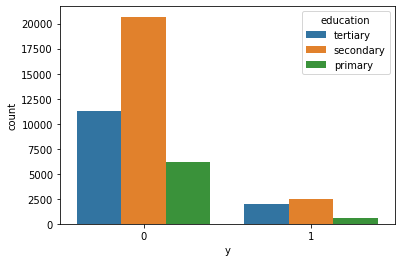

In [35]:
sns.countplot(x='y', hue='education', data= bank_data)

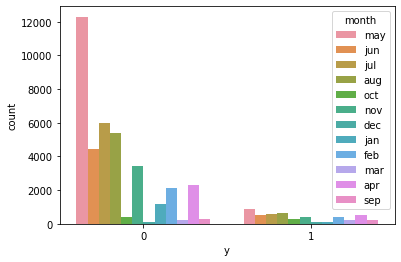

In [36]:
sns.countplot(x='y', hue ='month', data=bank_data)

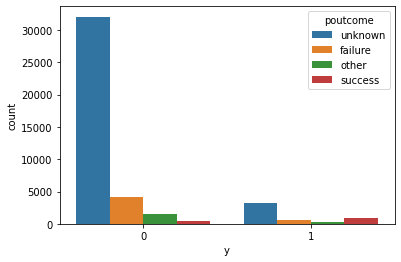

In [37]:
sns.countplot(x='y', hue ='poutcome', data=bank_data)

In [38]:
# continuous  = ['age', 'balance','day', 'duration', 'campaign', 'pdays','previous']

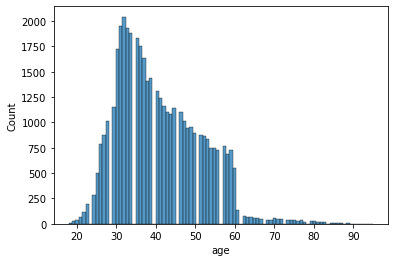

In [39]:
sns.histplot(bank_data.age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


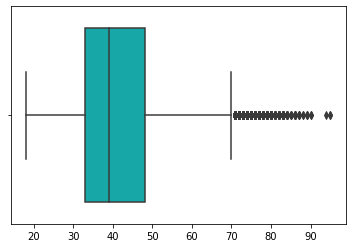

In [40]:
sns.boxplot(bank_data.age.values, color= 'c')

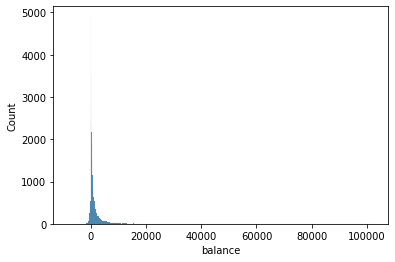

In [41]:
sns.histplot(bank_data.balance)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


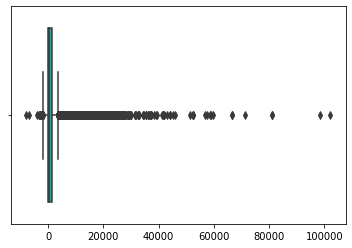

In [42]:
sns.boxplot(bank_data.balance.values, color= 'c')

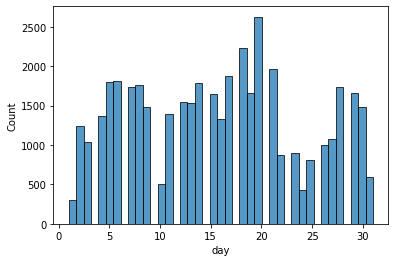

In [43]:
sns.histplot(bank_data.day)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


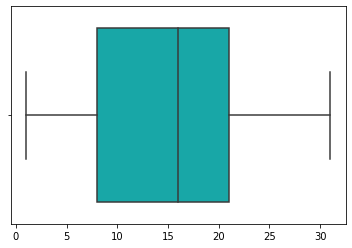

In [44]:
sns.boxplot(bank_data.day.values, color= 'c')

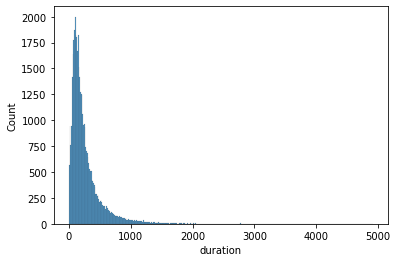

In [45]:
sns.histplot(bank_data.duration)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


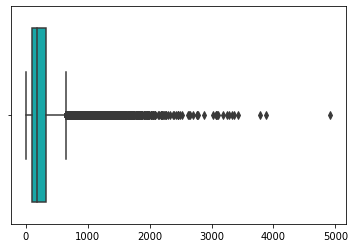

In [46]:
sns.boxplot(bank_data.duration.values, color= 'c')

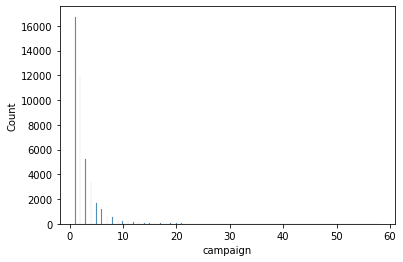

In [47]:
sns.histplot(bank_data.campaign)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


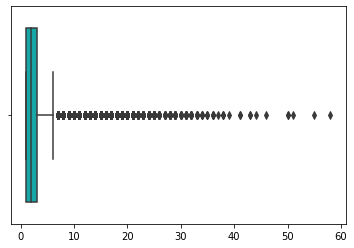

In [48]:
sns.boxplot(bank_data.campaign.values, color= 'c')

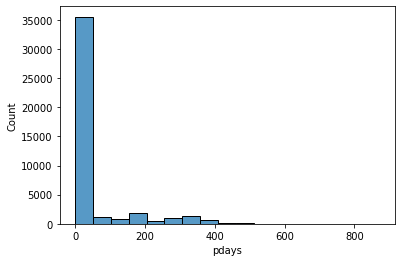

In [49]:
sns.histplot(bank_data.pdays)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


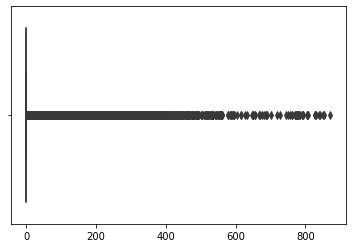

In [50]:
sns.boxplot(bank_data.pdays.values, color= 'c')

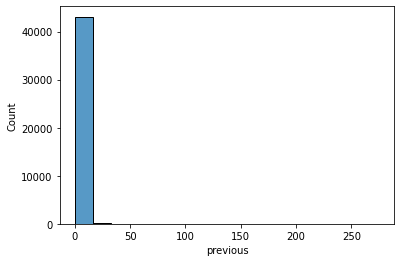

In [51]:
sns.histplot(bank_data.previous)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


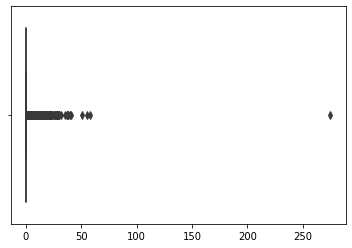

In [52]:
sns.boxplot(bank_data.previous.values, color= 'c')

# OneHotEncoder

In [53]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [54]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [55]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [56]:
job = list(bank_data.job)
values = array(job)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
job_list = list(integer_encoded)
#print(job_list)
bank_data.insert(loc=2, column="job_enc", value = job_list)
bank_data

,age,job,job_enc,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,4,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,9,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,2,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,4,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,4,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,5,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,5,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,1,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [57]:
marital = list(bank_data.marital)
values = array(marital)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
marital_list = list(integer_encoded)
#print(marital_list)
bank_data.insert(loc=4, column="marital_enc", value = marital_list)
bank_data

,age,job,job_enc,marital,marital_enc,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,4,married,1,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,9,single,2,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,2,married,1,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,4,married,1,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,4,single,2,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,1,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,5,divorced,0,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,5,married,1,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,1,married,1,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [58]:
education = list(bank_data.education)
values = array(education)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
education_list = list(integer_encoded)
#print(education_list)
bank_data.insert(loc=6, column="education_enc", value = education_list)
bank_data

,age,job,job_enc,marital,marital_enc,education,education_enc,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,4,married,1,tertiary,2,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,9,single,2,secondary,1,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,2,married,1,secondary,1,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,4,married,1,tertiary,2,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,4,single,2,tertiary,2,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,1,tertiary,2,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,5,divorced,0,primary,0,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,5,married,1,secondary,1,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,1,married,1,secondary,1,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [59]:
contact = list(bank_data.contact)
values = array(contact)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
contact_list = list(integer_encoded)
#print(contact_list)
bank_data.insert(loc=12, column="contact_enc", value = contact_list)
bank_data

,age,job,job_enc,marital,marital_enc,education,education_enc,default,balance,housing,...,contact,contact_enc,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,4,married,1,tertiary,2,0,2143,1,...,unknown,2,5,may,261,1,-1,0,unknown,0
1,44,technician,9,single,2,secondary,1,0,29,1,...,unknown,2,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,2,married,1,secondary,1,0,2,1,...,unknown,2,5,may,76,1,-1,0,unknown,0
5,35,management,4,married,1,tertiary,2,0,231,1,...,unknown,2,5,may,139,1,-1,0,unknown,0
6,28,management,4,single,2,tertiary,2,0,447,1,...,unknown,2,5,may,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,1,tertiary,2,0,825,0,...,cellular,0,17,nov,977,3,-1,0,unknown,1
45207,71,retired,5,divorced,0,primary,0,0,1729,0,...,cellular,0,17,nov,456,2,-1,0,unknown,1
45208,72,retired,5,married,1,secondary,1,0,5715,0,...,cellular,0,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,1,married,1,secondary,1,0,668,0,...,telephone,1,17,nov,508,4,-1,0,unknown,0


In [60]:
month = list(bank_data.month)
values = array(month)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
month_list = list(integer_encoded)
#print(month_list)
bank_data.insert(loc=15, column="month_enc", value = month_list)
bank_data

,age,job,job_enc,marital,marital_enc,education,education_enc,default,balance,housing,...,contact_enc,day,month,month_enc,duration,campaign,pdays,previous,poutcome,y
0,58,management,4,married,1,tertiary,2,0,2143,1,...,2,5,may,8,261,1,-1,0,unknown,0
1,44,technician,9,single,2,secondary,1,0,29,1,...,2,5,may,8,151,1,-1,0,unknown,0
2,33,entrepreneur,2,married,1,secondary,1,0,2,1,...,2,5,may,8,76,1,-1,0,unknown,0
5,35,management,4,married,1,tertiary,2,0,231,1,...,2,5,may,8,139,1,-1,0,unknown,0
6,28,management,4,single,2,tertiary,2,0,447,1,...,2,5,may,8,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,1,tertiary,2,0,825,0,...,0,17,nov,9,977,3,-1,0,unknown,1
45207,71,retired,5,divorced,0,primary,0,0,1729,0,...,0,17,nov,9,456,2,-1,0,unknown,1
45208,72,retired,5,married,1,secondary,1,0,5715,0,...,0,17,nov,9,1127,5,184,3,success,1
45209,57,blue-collar,1,married,1,secondary,1,0,668,0,...,1,17,nov,9,508,4,-1,0,unknown,0


In [61]:
poutcome = list(bank_data.poutcome)
values = array(poutcome)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
poutcome_list = list(integer_encoded)
#print(poutcome_list)
bank_data.insert(loc=21, column="poutcome_enc", value = poutcome_list)
bank_data

,age,job,job_enc,marital,marital_enc,education,education_enc,default,balance,housing,...,day,month,month_enc,duration,campaign,pdays,previous,poutcome,poutcome_enc,y
0,58,management,4,married,1,tertiary,2,0,2143,1,...,5,may,8,261,1,-1,0,unknown,3,0
1,44,technician,9,single,2,secondary,1,0,29,1,...,5,may,8,151,1,-1,0,unknown,3,0
2,33,entrepreneur,2,married,1,secondary,1,0,2,1,...,5,may,8,76,1,-1,0,unknown,3,0
5,35,management,4,married,1,tertiary,2,0,231,1,...,5,may,8,139,1,-1,0,unknown,3,0
6,28,management,4,single,2,tertiary,2,0,447,1,...,5,may,8,217,1,-1,0,unknown,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,1,tertiary,2,0,825,0,...,17,nov,9,977,3,-1,0,unknown,3,1
45207,71,retired,5,divorced,0,primary,0,0,1729,0,...,17,nov,9,456,2,-1,0,unknown,3,1
45208,72,retired,5,married,1,secondary,1,0,5715,0,...,17,nov,9,1127,5,184,3,success,2,1
45209,57,blue-collar,1,married,1,secondary,1,0,668,0,...,17,nov,9,508,4,-1,0,unknown,3,0


In [62]:
bank_data.columns

Index(['age', 'job', 'job_enc', 'marital', 'marital_enc', 'education',
       'education_enc', 'default', 'balance', 'housing', 'loan', 'contact',
       'contact_enc', 'day', 'month', 'month_enc', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'poutcome_enc', 'y'],
      dtype='object')

In [63]:
bank_data = bank_data.drop(['job', 'marital', 'education', 'month', 'contact', 'poutcome'], axis = 1)

In [64]:
bank_data

,age,job_enc,marital_enc,education_enc,default,balance,housing,loan,contact_enc,day,month_enc,duration,campaign,pdays,previous,poutcome_enc,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


# Model Building - Logistic Regression

In [65]:
bank_data.columns

Index(['age', 'job_enc', 'marital_enc', 'education_enc', 'default', 'balance',
       'housing', 'loan', 'contact_enc', 'day', 'month_enc', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome_enc', 'y'],
      dtype='object')

In [66]:
y=bank_data["y"]
y.head(10)

0     0
1     0
2     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
Name: y, dtype: int64

In [67]:
X=bank_data[bank_data.columns[0:16]]
X

,age,job_enc,marital_enc,education_enc,default,balance,housing,loan,contact_enc,day,month_enc,duration,campaign,pdays,previous,poutcome_enc
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [69]:
# Splitting dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [70]:
X_train

,age,job_enc,marital_enc,education_enc,default,balance,housing,loan,contact_enc,day,month_enc,duration,campaign,pdays,previous,poutcome_enc
24474,49,4,1,2,0,7007,0,0,0,17,9,325,2,-1,0,3
23961,56,4,1,2,0,665,0,0,0,29,1,25,12,-1,0,3
25128,31,0,1,1,0,113,1,0,0,18,9,474,3,-1,0,3
31307,30,8,2,1,0,685,0,0,1,10,7,230,2,-1,0,3
9337,36,3,1,0,0,122,0,0,2,6,6,78,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6588,49,9,0,1,0,181,1,0,2,28,8,230,8,-1,0,3
11953,37,7,1,1,0,1483,0,0,2,20,6,32,9,-1,0,3
39815,46,0,0,1,0,2087,0,0,0,1,6,111,1,119,4,1
946,35,7,1,1,0,528,0,0,2,7,8,274,2,-1,0,3


In [71]:
y_train

24474    0
23961    0
25128    0
31307    0
9337     0
        ..
6588     0
11953    0
39815    0
946      0
16639    0
Name: y, Length: 30235, dtype: int64

In [72]:
# LogisticRegression Model
logmodel = LogisticRegression()

In [73]:
# Fitting train data to LogisticRegression
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [74]:
predictions = logmodel.predict(X_test)
#classification_report(y_test,predictions)

In [75]:
# Confusion matrix
cfm=confusion_matrix(y_test,predictions)
cfm

array([[11221,   224],
       [ 1236,   277]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


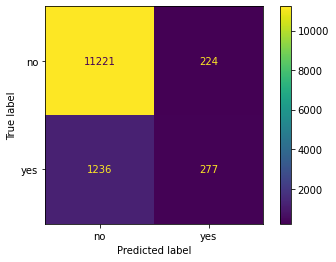

In [76]:
# Confusion matrix plot
metrics.plot_confusion_matrix(logmodel, X_test, y_test, display_labels=['no', 'yes'])

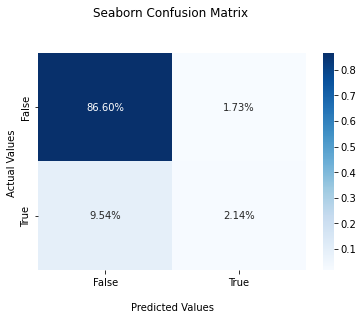

In [77]:
# Seaborn confusion matrix plot

ax = sns.heatmap(cfm/np.sum(cfm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [78]:
# Accuracy of the model
accuracy_score(y_test,predictions)

0.8873282914029943

In [79]:
# Classifucation report
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11445
           1       0.55      0.18      0.28      1513

    accuracy                           0.89     12958
   macro avg       0.73      0.58      0.61     12958
weighted avg       0.86      0.89      0.86     12958

